<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week7/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.



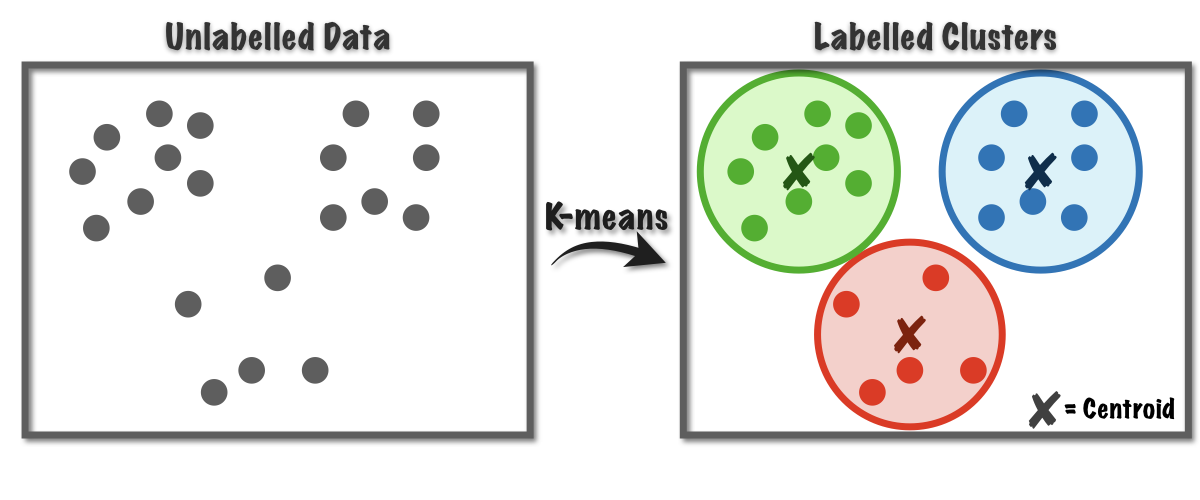

1. Pick K **random** objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

## Iris flower dataset

It is a standard dataset from seaborn. It contains various measurements for 150 flowers belonging to 3 different species.

In [93]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


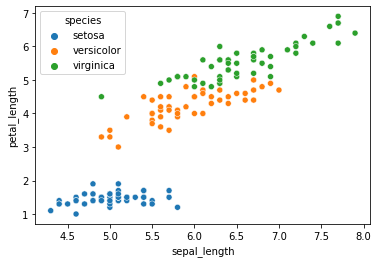

In [94]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

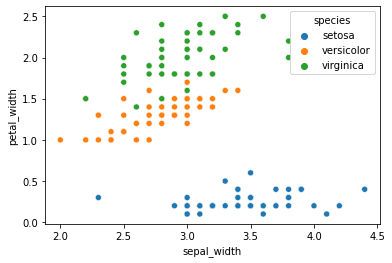

In [96]:
sns.scatterplot(data=iris_df, x='sepal_width', y='petal_width', hue='species');

Let's cluster observations using numeric columns in the data.

In [95]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]

We know that there are 3 species, therefore let's set 3 as the number of clusters that k-means should identify

In [97]:
model = KMeans(n_clusters=3, random_state=2021)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

We can check the cluster centers for each cluster.

In [98]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Classify points using the model.

In [99]:
predictions = model.predict(X)
# (or use .labels_)

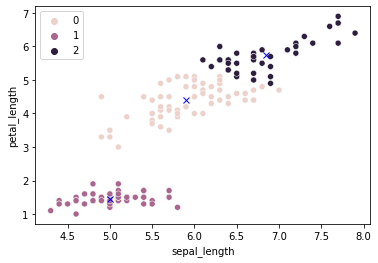

In [102]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=predictions);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

The K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. 


We can check the "goodness" of the fit by looking at model.inertia_, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [103]:
model.inertia_

78.85144142614601

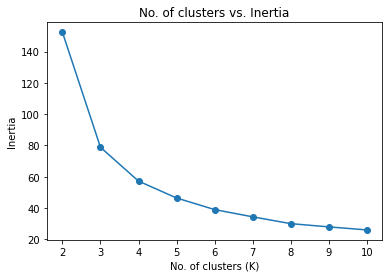

In [104]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.



## Food nutrient content

In [144]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')

In [145]:
food.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,0,0,0.177,1.03,60,0.036,1.8,6.89,0.014,87.50,1.658,0.497,2.009,4.38,32,0.052,0.03,3,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,0,0,0.110,3.34,58,0.137,1.9,4.89,0.057,89.04,0.426,0.065,1.164,1.99,126,0.001,0.00,12,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,0,0,0.105,3.28,31,0.138,1.9,4.81,0.056,88.10,0.688,0.108,1.860,3.20,123,0.001,0.00,12,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,0,0,0.043,3.10,28,0.105,2.0,4.46,0.020,88.20,0.999,0.128,2.154,3.46,101,0.010,0.05,5,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,0,0,0.105,3.28,31,0.138,1.9,4.81,0.056,88.10,0.688,0.108,1.860,3.20,123,0.001,0.00,12,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [146]:
food['Category'].value_counts()

Infant formula                          173
Rice                                    143
Bread                                   119
Potato                                  105
Cookie                                  100
                                       ... 
Turkey ham                                1
Trifle                                    1
Seaweed soup                              1
Garbanzo bean or chickpea soup            1
Beef and noodles with mushroom sauce      1
Name: Category, Length: 2429, dtype: int64

In [147]:
food.shape

(7083, 38)

#### Prepare the data

In [163]:
food_ML = food.drop(columns = ['Category', 'Description'])
# food_ML = skl.preprocessing.scale(food_ML, axis=0)  ### WHAT HAPPENS IF WE STANDARDIZE?


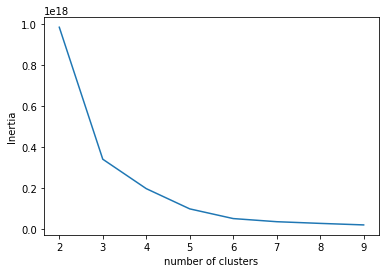

In [164]:
np.random.seed(2021)
tv = []
for i in range(2, 10):
    km = skl.cluster.KMeans(n_clusters=i).fit(food_ML)
    tv.append(km.inertia_)
    
plt.plot(range(2,10), tv)
plt.xlabel("number of clusters")
plt.ylabel("Inertia");

Also here, 3 is the optimal number of clusters

In [165]:
Nclust = 3

foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)


In [166]:
food['Cluster'] = foodclustersKM.labels_

In [167]:
food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water']]

,Data.Protein,Data.Carbohydrate,Data.Fat.Total Lipid,Data.Fiber,Data.Water
0,1.03,6.89,4.38,0.0,87.50
1,3.34,4.87,1.99,0.0,89.04
2,3.28,4.67,3.20,0.0,88.10
3,3.10,4.46,3.46,0.0,88.20
4,3.28,4.67,3.20,0.0,88.10
...,...,...,...,...,...
7078,1.11,5.48,0.23,1.6,92.57
7079,3.46,4.81,0.38,1.4,90.37
7080,1.81,11.60,0.19,2.2,85.59
7081,1.34,17.14,22.85,0.6,55.97


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Carbohydrate')

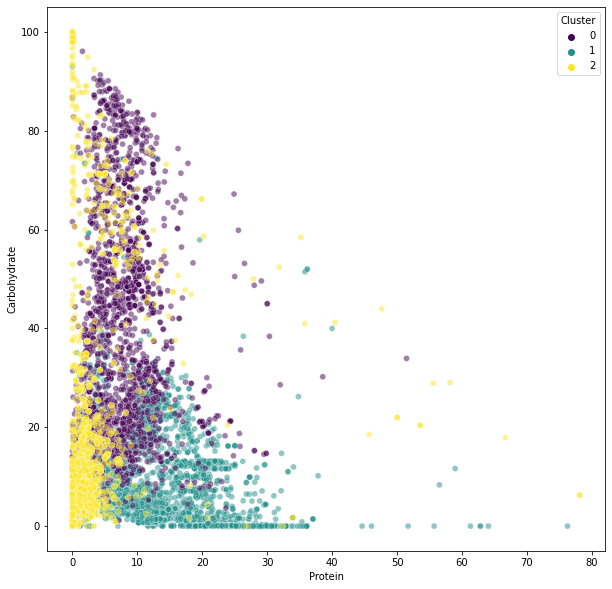

In [168]:
plt.figure(figsize  = (10,10))
sns.scatterplot(food['Data.Protein'], food['Data.Carbohydrate'], hue=food['Cluster'], palette='viridis', alpha = 0.5)
# plt.axis('off')
plt.xlabel('Protein')
plt.ylabel('Carbohydrate')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Lipid')

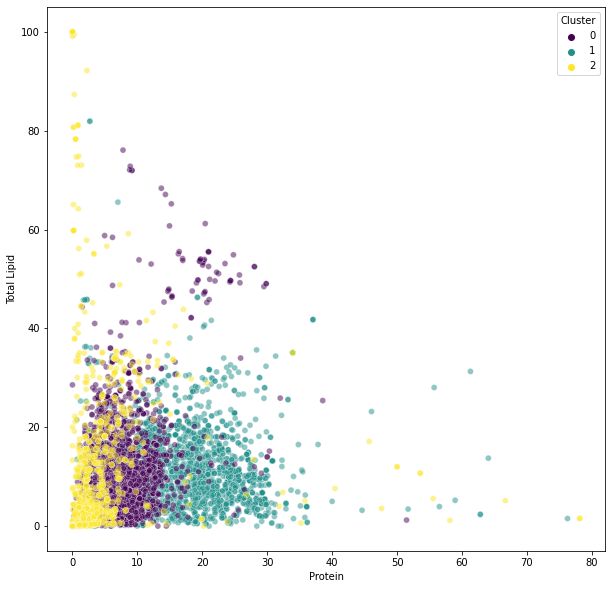

In [169]:
plt.figure(figsize  = (10,10))
sns.scatterplot(food['Data.Protein'], food['Data.Fat.Total Lipid'], hue=food['Cluster'], palette='viridis', alpha = 0.5)
plt.xlabel('Protein')
plt.ylabel('Total Lipid')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Lipid')

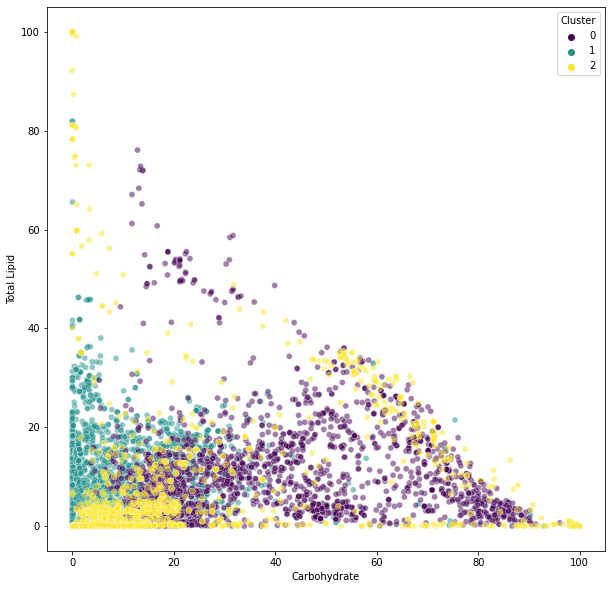

In [170]:
plt.figure(figsize  = (10,10))
sns.scatterplot(food['Data.Carbohydrate'], food['Data.Fat.Total Lipid'], hue=food['Cluster'], palette='viridis', alpha = 0.5)
plt.xlabel('Carbohydrate')
plt.ylabel('Total Lipid')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Fiber')

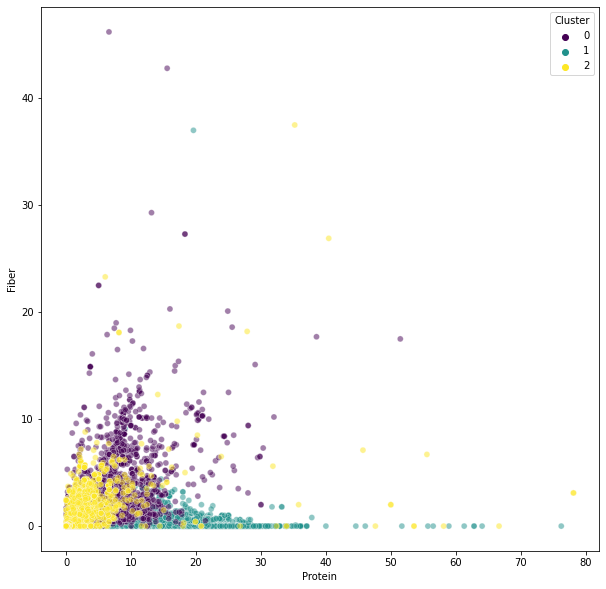

In [171]:
plt.figure(figsize  = (10,10))
sns.scatterplot(food['Data.Protein'], food['Data.Fiber'], hue=food['Cluster'], palette='viridis', alpha = 0.5)
plt.xlabel('Protein')
plt.ylabel('Fiber')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Water')

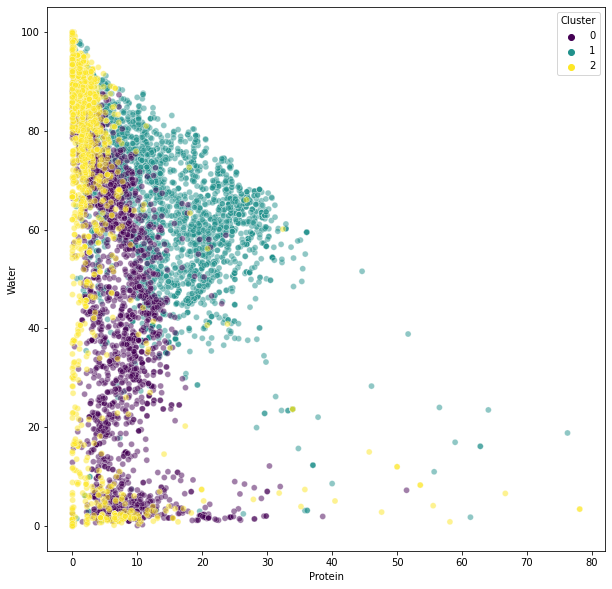

In [172]:


plt.figure(figsize  = (10,10))
sns.scatterplot(food['Data.Protein'], food['Data.Water'], hue=food['Cluster'], palette='viridis', alpha = 0.5)
plt.xlabel('Protein')
plt.ylabel('Water')


Any guesses on which are the food categories?

In [ ]:
food[food['Cluster'] == 0 ]['Category'].value_counts()

In [ ]:
food[food['Cluster'] == 1 ]['Category'].value_counts().head(20)

In [ ]:
food[food['Cluster'] == 2 ]['Category'].value_counts()

## Kidney gene expression dataset

Data from kidney microarray data: http://www.dkfz.de/mga

In [48]:
genes = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week7/genes.csv")


In [49]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


### Explore the data

In [51]:
genes.shape

(4224, 75)

In [52]:
np.where(genes.isna())

(array([], dtype=int64), array([], dtype=int64))

Scale each column

In [105]:
scaledgenes = skl.preprocessing.scale(genes, axis=0)


In [106]:
scaledgenes

array([[-1.73164081, -0.10390895, -1.44631227, ...,  1.13208158,
         0.49320283,  0.95276799],
       [-1.73082071, -0.73943251,  0.53879462, ...,  0.95494912,
        -0.6950822 ,  0.5877214 ],
       [-1.73000061,  0.01024745, -0.52957084, ..., -0.40602471,
        -0.51034181, -0.08564642],
       ...,
       [ 1.73000061,  0.00563416,  0.42958277, ...,  0.58686221,
         0.25470697, -0.12942973],
       [ 1.73082071, -0.9117855 ,  0.45020596, ...,  0.50842701,
         0.26562461,  0.29644913],
       [ 1.73164081, -1.61885048, -0.07257629, ..., -0.36455808,
        -1.06687976, -0.55175871]])

use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html



In [108]:
twodproj = skl.manifold.TSNE(n_components=2).fit_transform(scaledgenes)



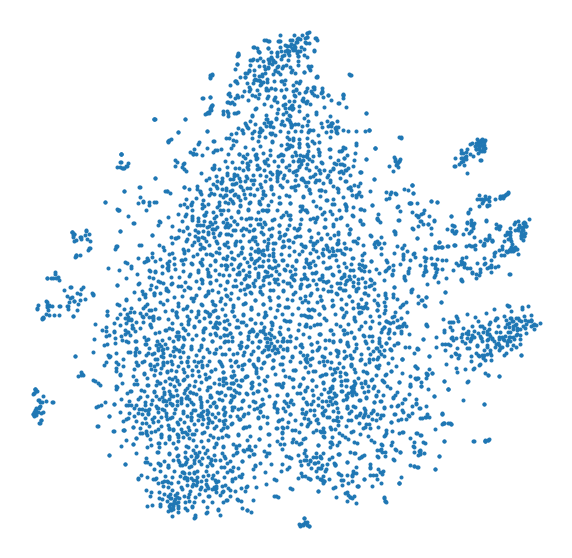

In [109]:
plt.figure(figsize  = (10,10))
plt.plot(twodproj[:,0], twodproj[:,1], '.')
plt.axis('off');


This 2D projection is generates with the TSNE algorithm with default sklearn parameters corresponding to 30 nearest-neighbours and a Eucledian distance metric in the 72 dimensional parameter space. Note that TSNE plots are an exception to the rule that axis always need to be labelled! the TSNE projections are unitless and do not have any meaning.

### Clustering
Cluster the data with K-Means using 1 to 10 clusters. Use the inertia as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters?

In [64]:
from sklearn import cluster

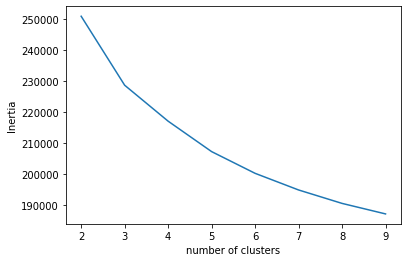

In [112]:

np.random.seed(2021)
tv = []
for i in range(2, 10):
    km = skl.cluster.KMeans(n_clusters=i).fit(scaledgenes)
    tv.append(km.inertia_)
    
plt.plot(range(2,10), tv)
plt.xlabel("number of clusters")
plt.ylabel("Inertia");

an "elbow" plot for k-means clustering of the kidpack genes dataset. The prominent bend in the plot of inertia vs number of clusters at Nclusters = 3 suggests that this is the correct number of clusters for a k-means clustering analysis

### Plot the clusters subdivision as color-coded elements on the TSNE projection

In [68]:

Nclust = 3

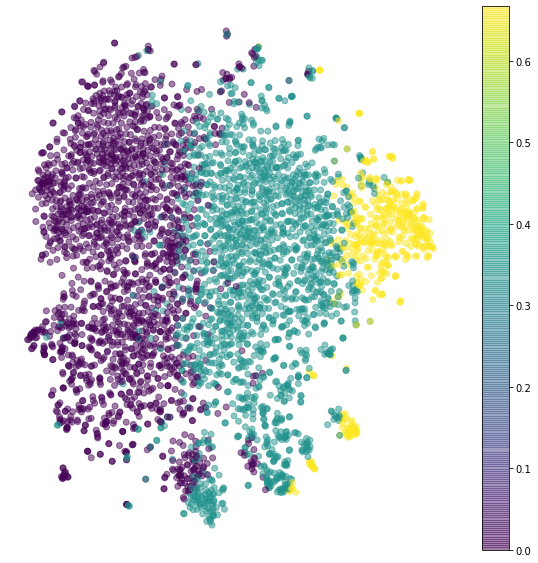

In [72]:
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)

plt.figure(figsize  = (10,10))
plt.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=0.5)
plt.axis('off')
plt.colorbar();

In [73]:
Nclust = 6

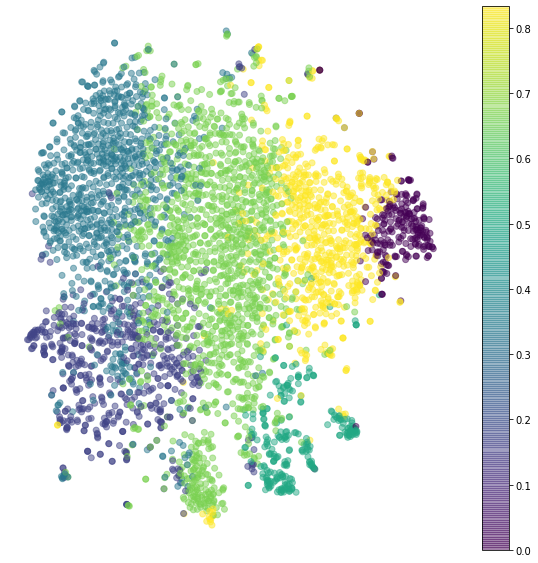

In [74]:
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)

plt.figure(figsize  = (10,10))
plt.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=0.5)
plt.axis('off')
plt.colorbar();